# Project 7:  Airport Data Analysis


#### Step 1: Load the python libraries that you will need for this project 

In [83]:
import pandas as pd 
import matplotlib 
from matplotlib import pyplot as plt
import numpy as np
import sklearn
import psycopg2 as psy
import seaborn as sns
from sqlalchemy import create_engine
%matplotlib inline

#### Step 2: Examine your data 

In [84]:
cancel = pd.read_csv('../assets/cancellations.csv')
airports = pd.read_csv('../assets/airports.csv')
operations = pd.read_csv('../assets/operations.csv')

Check out cancel dataframe:

In [85]:
cancel.head(2)

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004.0,242.0,235.0,71.0,46.0
1,ABQ,2005.0,221.0,190.0,61.0,33.0


In [86]:
cancel.isnull().sum()

Airport                    0
Year                       0
Departure Cancellations    0
Arrival Cancellations      0
Departure Diversions       0
Arrival Diversions         0
dtype: int64

In [87]:
len(cancel)

805

In [88]:
cancel.dtypes

Airport                     object
Year                       float64
Departure Cancellations    float64
Arrival Cancellations      float64
Departure Diversions       float64
Arrival Diversions         float64
dtype: object

In [89]:
for column in ['Year', 'Departure Cancellations', 'Arrival Cancellations', 'Departure Diversions', \
               'Arrival Diversions']:
    cancel[column] = cancel[column].apply(lambda x: int(x))

In [90]:
cancel.dtypes

Airport                    object
Year                        int64
Departure Cancellations     int64
Arrival Cancellations       int64
Departure Diversions        int64
Arrival Diversions          int64
dtype: object

In [91]:
set(cancel['Airport'].value_counts())

{6, 7, 11}

In [92]:
cancel['Airport'].value_counts(ascending = True).head(5)

RFD     6
OXR     7
JFK    11
DAL    11
PBI    11
Name: Airport, dtype: int64

In [93]:
len(cancel['Airport'].value_counts())

74

This airport is in Rockford, IL:

In [94]:
cancel[cancel['Airport'] == 'RFD']

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
634,RFD,2006,9,11,2,8
635,RFD,2007,4,7,2,11
636,RFD,2008,5,2,0,5
637,RFD,2011,0,0,0,0
638,RFD,2012,1,1,0,0
639,RFD,2013,0,0,0,0


This airport is in Oxnard, CA:

In [95]:
cancel[cancel['Airport'] == 'OXR']

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
539,OXR,2004,43,37,0,0
540,OXR,2005,33,22,0,0
541,OXR,2006,51,44,2,1
542,OXR,2007,21,17,1,0
543,OXR,2008,20,20,1,0
544,OXR,2009,27,24,0,0
545,OXR,2010,10,8,0,0


Judging by number of flights listed for these two airports, they seem tiny.  Let's take them out so we have consistent number of years' data for each airport.

In [96]:
cancel = cancel[cancel['Airport'] != 'RFD']
cancel = cancel[cancel['Airport'] != 'OXR']

In [97]:
cancel['Year'].value_counts()

2014    72
2013    72
2012    72
2011    72
2010    72
2009    72
2008    72
2007    72
2006    72
2005    72
2004    72
Name: Year, dtype: int64

In [98]:
len(cancel)

792

In [99]:
cancel['Departure Cancellations'].describe()

count      792.000000
mean      1312.963384
std       1843.638404
min         14.000000
25%        362.750000
50%        688.500000
75%       1488.250000
max      16618.000000
Name: Departure Cancellations, dtype: float64

In [100]:
cancel['Arrival Cancellations'].describe()

count      792.000000
mean      1354.762626
std       1984.086907
min         11.000000
25%        329.750000
50%        654.500000
75%       1554.750000
max      17571.000000
Name: Arrival Cancellations, dtype: float64

In [101]:
cancel['Departure Diversions'].describe()

count     792.000000
mean      176.150253
std       172.316327
min         3.000000
25%        63.000000
50%       113.000000
75%       238.000000
max      1064.000000
Name: Departure Diversions, dtype: float64

In [102]:
cancel['Arrival Diversions'].describe()

count     792.000000
mean      172.162879
std       229.372122
min         1.000000
25%        42.000000
50%        86.500000
75%       190.250000
max      1948.000000
Name: Arrival Diversions, dtype: float64

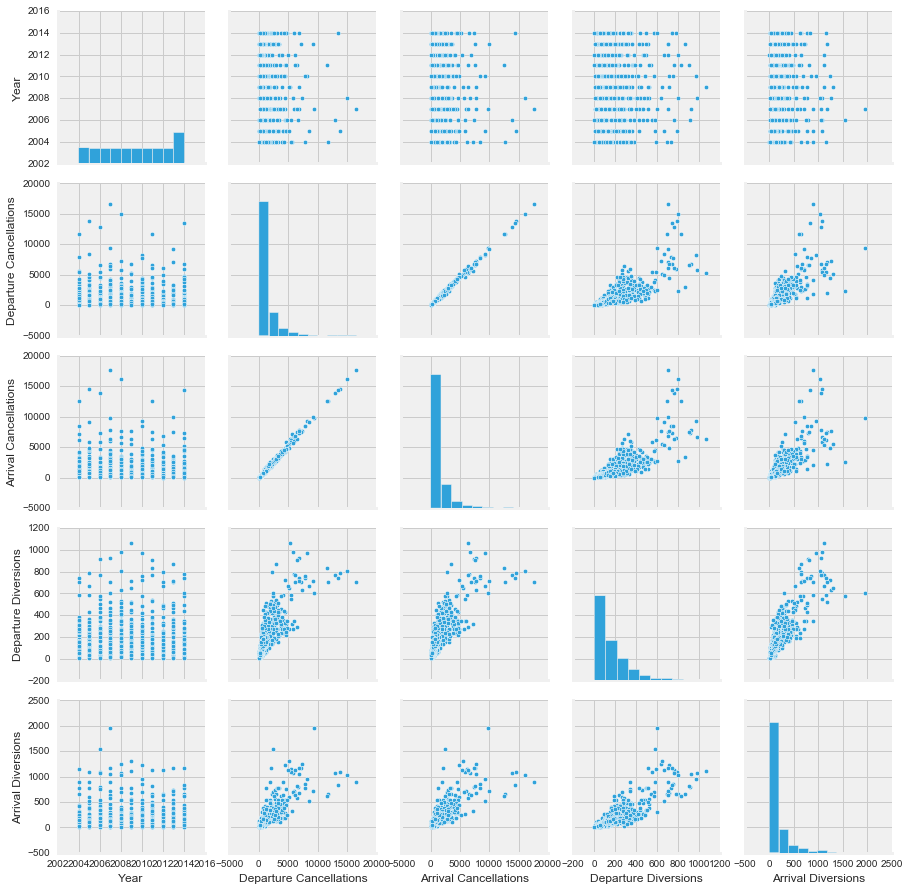

In [103]:
sns.pairplot(cancel)

Check out airports dataframe:

In [104]:
airports.head(2)

,Key,LocID,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
0,3443.0,STX,HENRY E ROHLSEN,Henry E Rohlsen Int'l Airport,Airport,ASO,-VIRGIN ISLANDS-,CHRISTIANSTED,VI,Public Use,17.701556,-64.801722,Yes
1,5088.0,X64,PATILLAS,NaN,Airport,ASO,#NAME?,PATILLAS,PR,Public Use,17.982189,-66.019330,No


In [105]:
len(airports)

5167

In [106]:
airports.isnull().sum()

Key                           3
LocID                        15
AP_NAME                       3
ALIAS                      1669
Facility Type                 3
FAA REGION                    3
COUNTY                        3
CITY                          3
STATE                         3
AP Type                       3
Latitude                      3
Longitude                     3
Boundary Data Available       3
dtype: int64

In [107]:
del airports['ALIAS'] # use 'LocID' instead; this one is wordy

In [108]:
airports[airports['Key'].isnull()]

,Key,LocID,AP_NAME,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
5164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
airports = airports.drop(airports.index[[5164, 5165, 5166]])

Confirm 'LocID' is what we think it is:

In [110]:
airports[airports['LocID'] == 'JFK']

,Key,LocID,AP_NAME,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
2752,2458.0,JFK,JOHN F KENNEDY INTL,Airport,AEA,QUEENS,NEW YORK,NY,Federalized/Commercial,40.639751,-73.778926,Yes


In [111]:
airports[airports['LocID'].isnull()][['LocID', 'AP_NAME', 'STATE']]

,LocID,AP_NAME,STATE
182,NaN,TERLINGUA RANCH,TX
1208,NaN,MORIARTY,NM
1232,NaN,BUFFALO,TX
1233,NaN,MAPLES FIELD,TX
1408,NaN,MIAMI-ROBERTS COUNTY,TX
2670,NaN,PACKER,OH
2789,NaN,CORYDON,IA
3354,NaN,CACKLEBERRY,MI
3546,NaN,SHARPE'S STRIP,MI
3936,NaN,MOORES,NY


We don't know if these airports will still be around after we merge dataframes, but let's search online and fill in proper 'LocID' entry anyway:

In [113]:
airports['LocID'][182] = '1E2'
airports['LocID'][1208] = '0E0'
airports['LocID'][1232] = '1E7'
airports['LocID'][1233] = '1E9'
airports['LocID'][1408] = '3E0'
airports['LocID'][2670] = '5E9'
airports['LocID'][2789] = '0E9'
airports['LocID'][3354] = '2E8'
airports['LocID'][3546] = '2E2'
airports['LocID'][3936] = '1E8'
airports['LocID'][4200] = '2E6'
airports['LocID'][4450] = '4E8'

In [114]:
airports.isnull().sum()

Key                        0
LocID                      0
AP_NAME                    0
Facility Type              0
FAA REGION                 0
COUNTY                     0
CITY                       0
STATE                      0
AP Type                    0
Latitude                   0
Longitude                  0
Boundary Data Available    0
dtype: int64

In [115]:
len(airports)

5164

In [116]:
len(airports['LocID'].unique())

5164

In [117]:
del airports['Key']

In [118]:
len(airports['AP_NAME'].unique())

4956

Hm, looks like some airport names are repeated (since there aren't 5164 unique names)... leave it for now.

In [119]:
airports['Facility Type'].value_counts()

Airport    5164
Name: Facility Type, dtype: int64

In [120]:
del airports['Facility Type']

In [121]:
airports['FAA REGION'].value_counts()

AGL    1074
ASW     769
ASO     745
ANM     649
ACE     473
AEA     468
AAL     406
AWP     397
ANE     183
Name: FAA REGION, dtype: int64

In [122]:
airports['AP Type'].value_counts()

Public Use                4876
Federalized/Commercial     288
Name: AP Type, dtype: int64

In [123]:
airports['Boundary Data Available'].value_counts()

Yes    3498
No     1666
Name: Boundary Data Available, dtype: int64

Looking like the USA!

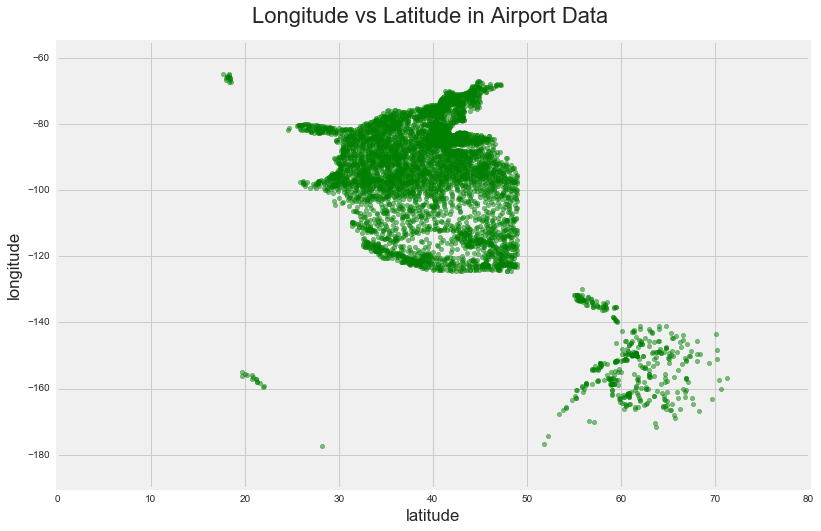

In [124]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

# state_color = []
# count = 0
# for i in airports['STATE']:
#     lil_color = cm.Set1(i/56)
#     state_color.append(lil_color)

plt.scatter(airports['Latitude'], airports['Longitude'], color = 'green', alpha = 0.5)

plt.title('Longitude vs Latitude in Airport Data ', fontsize = 22, y = 1.03)

# y label
plt.ylabel('longitude')

# x label
plt.xlabel('latitude')

# set the figure boundaries
plt.xlim([0, 80])
plt.ylim([-190, -55])
plt.grid(True)

plt.show()

Redundant information/too much geographic information/go out on a limb and say we won't need partial 'boundary data':

In [125]:
del airports['AP_NAME']
del airports['COUNTY']
del airports ['Boundary Data Available']

In [126]:
airports['AP Type'] = pd.get_dummies(airports[['AP Type']])

In [127]:
faa_region = pd.get_dummies(airports[['FAA REGION']])

In [128]:
faa_region.sum()

FAA REGION_AAL     406.0
FAA REGION_ACE     473.0
FAA REGION_AEA     468.0
FAA REGION_AGL    1074.0
FAA REGION_ANE     183.0
FAA REGION_ANM     649.0
FAA REGION_ASO     745.0
FAA REGION_ASW     769.0
FAA REGION_AWP     397.0
dtype: float64

In [129]:
airports = pd.concat([airports, faa_region], axis = 1)

In [130]:
del airports['FAA REGION']

Take a look at operations dataframe:

In [131]:
operations.head(2)

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.803,0.7809,0.7921,10.38,9.89,2.43,12.1,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.814,0.7922,0.8001,9.60,9.79,2.29,11.2,2.26,0.89,2.34,10.24


In [132]:
operations.isnull().sum()

airport                               0
year                                  0
departures for metric computation     0
arrivals for metric computation       0
percent on-time gate departures       0
percent on-time airport departures    0
percent on-time gate arrivals         0
average_gate_departure_delay          0
average_taxi_out_time                 0
average taxi out delay                0
average airport departure delay       0
average airborne delay                0
average taxi in delay                 0
average block delay                   0
average gate arrival delay            0
dtype: int64

In [133]:
operations.dtypes

airport                                object
year                                    int64
departures for metric computation       int64
arrivals for metric computation         int64
percent on-time gate departures       float64
percent on-time airport departures    float64
percent on-time gate arrivals         float64
average_gate_departure_delay          float64
average_taxi_out_time                 float64
average taxi out delay                float64
average airport departure delay       float64
average airborne delay                float64
average taxi in delay                 float64
average block delay                   float64
average gate arrival delay            float64
dtype: object

In [134]:
len(operations)

841

In [135]:
operations['year'].value_counts()

2014    77
2013    77
2012    77
2011    77
2010    77
2009    77
2008    77
2007    77
2006    75
2005    75
2004    75
Name: year, dtype: int64

In [136]:
set(operations['airport'].value_counts())

{8, 11}

In [137]:
operations['airport'].value_counts(ascending = True).head(5)

SMF     8
PSP     8
JFK    11
DAL    11
PBI    11
Name: airport, dtype: int64

This is an airport in Sacramento, CA (missing 2004-06):

In [138]:
operations[operations['airport'] == 'SMF']

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
756,SMF,2007,65686,65960,0.8025,0.7690,0.7724,11.01,10.86,2.64,12.95,2.54,1.12,2.59,12.17
757,SMF,2008,61470,61500,0.8067,0.7884,0.7706,11.12,10.46,1.93,12.29,2.13,0.73,2.49,12.13
758,SMF,2009,52731,52905,0.8401,0.8281,0.8066,9.02,9.85,1.57,9.75,1.88,0.65,1.75,9.87
759,SMF,2010,51516,51632,0.8209,0.8073,0.7886,9.97,9.64,1.48,10.86,1.93,0.66,1.98,11.10
760,SMF,2011,50574,50719,0.8265,0.7981,0.8055,9.82,10.32,2.19,11.36,1.86,0.83,2.01,10.41
761,SMF,2012,49016,49085,0.8505,0.8285,0.8311,8.97,10.43,2.20,10.40,1.71,1.01,1.69,9.28
762,SMF,2013,46868,47183,0.8242,0.7999,0.8035,9.88,10.58,2.13,11.29,1.87,0.74,1.64,10.47
763,SMF,2014,47618,47523,0.7861,0.7661,0.7659,11.91,10.75,2.04,13.09,2.00,0.85,2.10,12.57


This is an airport in Palm Springs, CA (missing 2004-06):

In [139]:
operations[operations['airport'] == 'PSP']

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
616,PSP,2007,17764,17852,0.7411,0.7053,0.7011,13.53,11.40,3.03,15.56,2.48,1.00,3.52,15.67
617,PSP,2008,16005,16036,0.7683,0.7321,0.7312,12.35,12.16,3.10,14.32,2.82,1.17,3.71,13.87
618,PSP,2009,14802,14837,0.8128,0.7919,0.7853,10.22,11.90,2.32,11.52,2.67,0.68,2.88,10.95
619,PSP,2010,14769,14859,0.7944,0.7699,0.7574,11.54,11.77,2.50,12.97,3.07,0.73,3.12,12.86
620,PSP,2011,14458,14632,0.7738,0.7484,0.7484,12.76,11.89,2.64,14.33,3.35,0.77,3.30,13.57
621,PSP,2012,15601,15682,0.7692,0.7362,0.7587,14.00,12.51,3.14,15.98,3.23,0.84,3.20,12.85
622,PSP,2013,15346,15242,0.7754,0.7483,0.7683,14.15,12.50,2.72,15.76,2.89,0.95,2.91,12.66
623,PSP,2014,16231,16208,0.7632,0.7332,0.7512,14.56,12.67,2.74,16.29,3.19,0.99,3.78,13.81


In [140]:
operations = operations[operations['airport'] != 'PSP']
operations = operations[operations['airport'] != 'SMF']

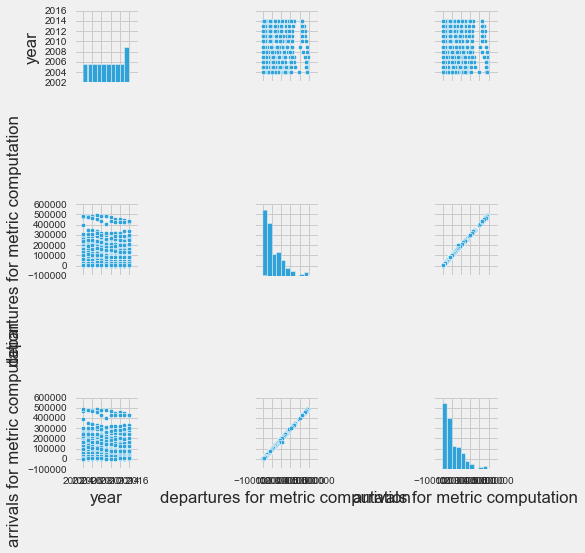

In [180]:
sns.pairplot(operations[['year', 'departures for metric computation', 'arrivals for metric computation']])

Let's see if we can merge dataframes on airport code:

In [141]:
only_cancel = []
for code in cancel['Airport']:
    if code in list(operations['airport']):
        continue
    else:
        only_cancel.append(code)
print set(only_cancel)

set(['SMF', 'PSP'])


In [142]:
only_operations = []
for code in operations['airport']:
    if code in list(cancel['Airport']):
        continue
    else:
        only_operations.append(code)
print set(only_operations)

set(['TEB', 'VNY', 'OXR', 'GYY', 'RFD'])


This airport is in Teterborough, NJ:

In [143]:
operations[(operations['airport'] == 'TEB') & (operations['year'] == 2014)]

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
807,TEB,2014,29836,29781,0.327,0.3121,0.4065,35.26,11.73,0.43,36.4,5.15,0.0,6.19,31.38


This airport is in Van Nuys, CA:

In [144]:
operations[(operations['airport'] == 'VNY') & (operations['year'] == 2014)]

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
840,VNY,2014,7412,7573,0.4014,0.3841,0.4507,28.87,11.7,0.4,29.96,2.92,0.0,3.89,28.97


This is airport is in Gary, IN:

In [145]:
operations[(operations['airport'] == 'GYY') & (operations['year'] == 2014)]

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
252,GYY,2014,729,752,0.5857,0.561,0.5505,22.02,11.57,0.33,22.93,3.12,0.0,3.59,23.08


That's nice, now let's get rid of them:

In [146]:
operations = operations[operations['airport'] != 'TEB']
operations = operations[operations['airport'] != 'VNY']
operations = operations[operations['airport'] != 'OXR']
operations = operations[operations['airport'] != 'GYY']
operations = operations[operations['airport'] != 'RFD']
cancel = cancel[cancel['Airport'] != 'SMF']
cancel = cancel[cancel['Airport'] != 'PSP']

In [147]:
len(operations)

770

In [148]:
len(cancel)

770

### Intro: Write a problem statement / aim for this project

We will try to figure out which features contribute to airport scheduling problems and consider approaches to fixing them.

### Part 1: Create a PostgreSQL database 

#### 1. Let's create a database where we can house our airport data

In [149]:
engine = create_engine('postgresql://@localhost:5432/airports')

airports.to_sql('airports', engine)

In [150]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [151]:
%%sql 
postgresql://@localhost:5432/airports

u'Connected: @airports'

In [152]:
%%sql
SELECT * FROM airports LIMIT 2;

2 rows affected.


index,LocID,AP_NAME,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
0,STX,HENRY E ROHLSEN,ASO,-VIRGIN ISLANDS-,CHRISTIANSTED,VI,Public Use,17.701556,-64.801722,Yes
1,X64,PATILLAS,ASO,#NAME?,PATILLAS,PR,Public Use,17.982189,-66.01933,No


Load our csv files into tables

In [78]:
cancel.to_sql("cancel", engine)
operations.to_sql("operations", engine)

In [72]:
%%sql
SELECT * FROM cancel LIMIT 2;

2 rows affected.


index,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004,242,235,71,46
1,ABQ,2005,221,190,61,33


Join airport_cancellations.csv and airports.csv into one table

In [73]:
%%sql

SELECT cancel.*, airports.* FROM airports 
JOIN cancel
ON ("LocID" = "Airport") LIMIT 2;

2 rows affected.


index,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,index_1,LocID,AP_NAME,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
727,SJU,2014,280,241,72,31,10,SJU,LUIS MUNOZ MARIN INTL,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,18.439295,-66.002004,Yes
726,SJU,2013,127,94,65,64,10,SJU,LUIS MUNOZ MARIN INTL,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,18.439295,-66.002004,Yes


In [74]:
%%sql

SELECT operations.*, airports.* FROM operations
JOIN airports
ON ("airport" = "LocID") LIMIT 2;

2 rows affected.


index,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay,index_1,LocID,AP_NAME,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
744,SJU,2014,43671,42965,0.8056,0.7784,0.7815,11.71,12.89,1.88,13.13,1.81,1.0,2.93,12.79,10,SJU,LUIS MUNOZ MARIN INTL,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,18.439295,-66.002004,Yes
743,SJU,2013,42902,42175,0.8058,0.7808,0.784,12.31,13.56,2.2,13.52,1.78,1.41,2.86,12.96,10,SJU,LUIS MUNOZ MARIN INTL,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,18.439295,-66.002004,Yes


Query the database for our intial data

In [79]:
# airports = pd.read_sql("airports", engine);
# cancel = pd.read_sql("cancel", engine);
# operations = pd.read_sql("operations", engine)

In [80]:
# del airports['index']
# del cancel['index']
# del operations['index']

#### 1.2 What are the risks and assumptions of our data? 

* don't know how data was collected (every airport?  every day?  who timed the delays?)
* deleted a few airports which didn't have data for all years; hopefully they're not crucial for underlying patterns
* assuming data from 2004-14 is helpful in predicting similar targets in 2016

### Part 2: Exploratory Data Analysis

#### 2.1 Plot and Describe the Data

In [153]:
airports.head(1)

,LocID,CITY,STATE,AP Type,Latitude,Longitude,FAA REGION_AAL,FAA REGION_ACE,FAA REGION_AEA,FAA REGION_AGL,FAA REGION_ANE,FAA REGION_ANM,FAA REGION_ASO,FAA REGION_ASW,FAA REGION_AWP
0,STX,CHRISTIANSTED,VI,0.0,17.701556,-64.801722,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [154]:
airports['Airport'] = airports['LocID']
del airports['LocID']

In [155]:
airports.head(1)

,CITY,STATE,AP Type,Latitude,Longitude,FAA REGION_AAL,FAA REGION_ACE,FAA REGION_AEA,FAA REGION_AGL,FAA REGION_ANE,FAA REGION_ANM,FAA REGION_ASO,FAA REGION_ASW,FAA REGION_AWP,Airport
0,CHRISTIANSTED,VI,0.0,17.701556,-64.801722,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,STX


In [156]:
cancel.head(1)

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004,242,235,71,46


In [157]:
operations.head(1)

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.803,0.7809,0.7921,10.38,9.89,2.43,12.1,2.46,0.83,2.55,10.87


In [158]:
big_airport = pd.concat([cancel, operations], axis = 1)

In [159]:
del big_airport['airport']
del big_airport['year']

In [160]:
big_airport.head(1)

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004.0,242.0,235.0,71.0,46.0,53971.0,53818.0,0.803,0.7809,0.7921,10.38,9.89,2.43,12.1,2.46,0.83,2.55,10.87


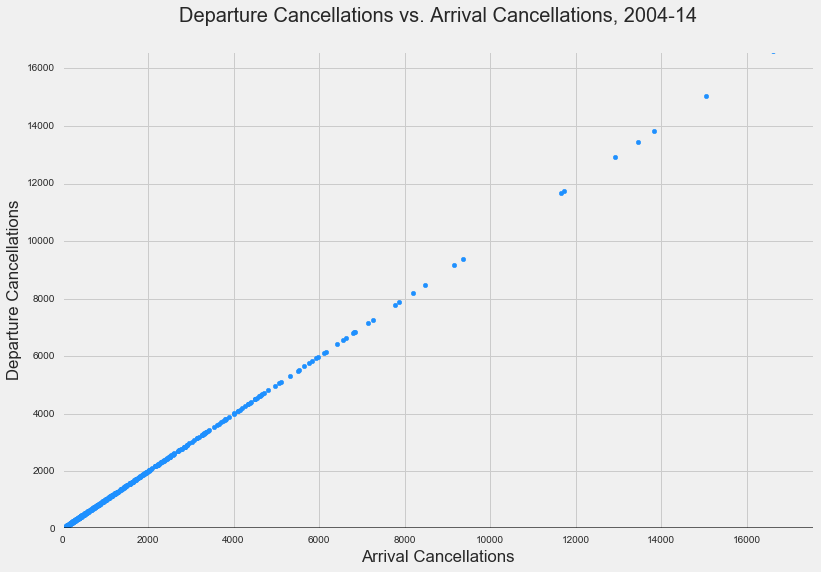

In [161]:

plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

plt.scatter(big_airport['Departure Cancellations'], big_airport['Departure Cancellations'], color = "dodgerblue")
plt.axhline(0, color='black', alpha = 0.6)
plt.title('Departure Cancellations vs. Arrival Cancellations, 2004-14', fontsize = 20, y = 1.05)

# y label
plt.ylabel('Departure Cancellations')

# x label
plt.xlabel('Arrival Cancellations', y = 0.1)

plt.xlim([0, max(big_airport['Arrival Cancellations'])])
plt.ylim([0, max(big_airport['Departure Cancellations'])])


plt.show()

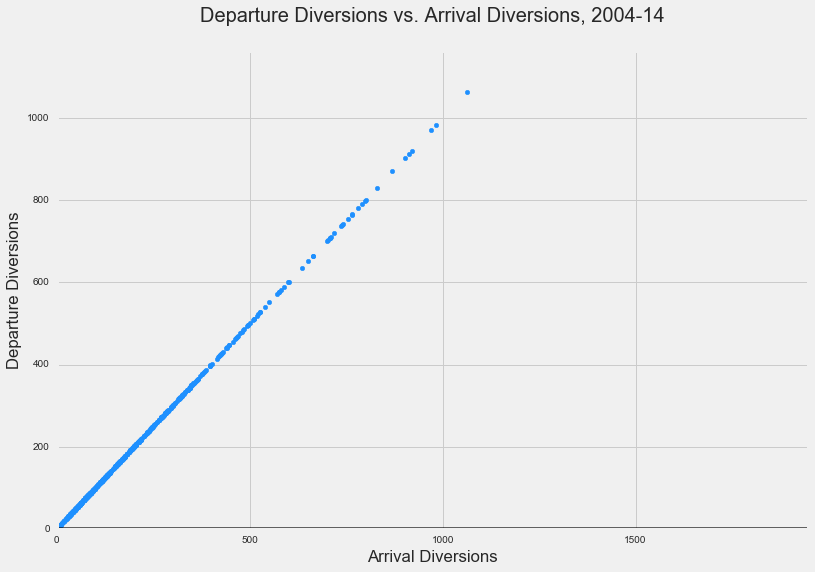

In [162]:

plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

plt.scatter(big_airport['Departure Diversions'], big_airport['Departure Diversions'], color = "dodgerblue")
plt.axhline(0, color='black', alpha = 0.6)
plt.title('Departure Diversions vs. Arrival Diversions, 2004-14', fontsize = 20, y = 1.05)

# y label
plt.ylabel('Departure Diversions')

# x label
plt.xlabel('Arrival Diversions', y = 0.1)

plt.xlim([0, max(big_airport['Arrival Diversions'])])
plt.ylim([0, max(big_airport['Departure Diversions'] + 100)])


plt.show()

These are not very useful to have as pairs of features; one of each would most likely suffice.

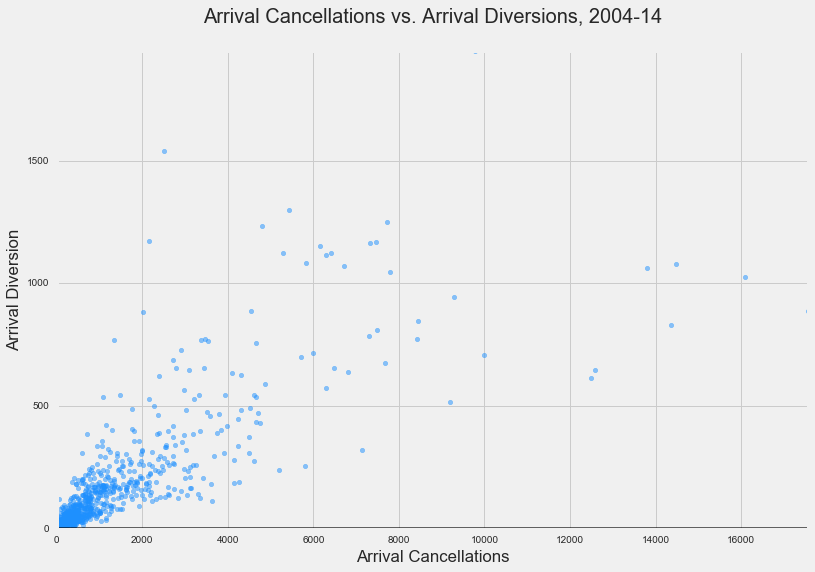

In [163]:

plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

plt.scatter(big_airport['Arrival Cancellations'], big_airport['Arrival Diversions'], color = "dodgerblue", alpha = 0.5)
plt.axhline(0, color='black', alpha = 0.6)
plt.title('Arrival Cancellations vs. Arrival Diversions, 2004-14', fontsize = 20, y = 1.05)

# y label
plt.ylabel('Arrival Diversion')

# x label
plt.xlabel('Arrival Cancellations', y = 0.1)

plt.xlim([0, max(big_airport['Arrival Cancellations'])])
plt.ylim([0, max(big_airport['Arrival Diversions'])])


plt.show()

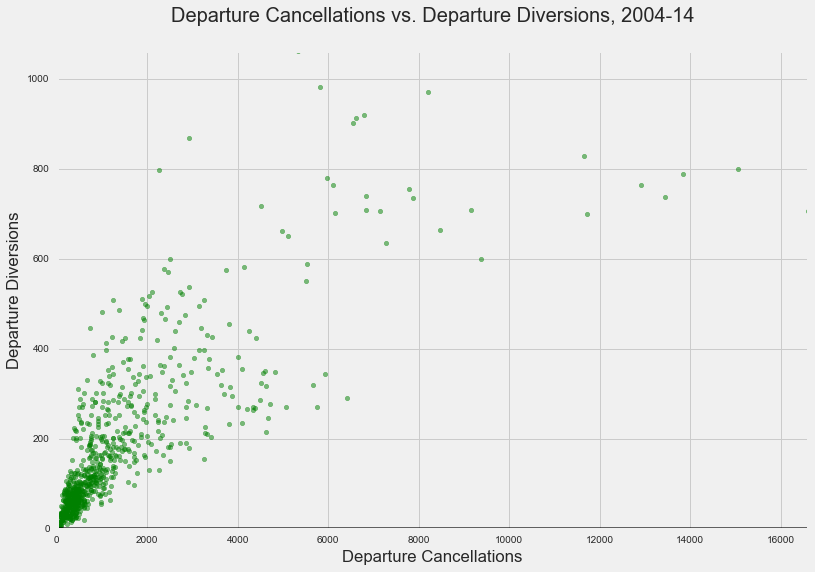

In [164]:

plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

plt.scatter(big_airport['Departure Cancellations'], big_airport['Departure Diversions'], color = "green", alpha = 0.5)
plt.axhline(0, color='black', alpha = 0.6)
plt.title('Departure Cancellations vs. Departure Diversions, 2004-14', fontsize = 20, y = 1.05)

# y label
plt.ylabel('Departure Diversions')

# x label
plt.xlabel('Departure Cancellations', y = 0.1)

plt.xlim([0, max(big_airport['Departure Cancellations'])])
plt.ylim([0, max(big_airport['Departure Diversions'])])


plt.show()

#### Are there any unique values? 

In [165]:
big_airport.head(1)

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004.0,242.0,235.0,71.0,46.0,53971.0,53818.0,0.803,0.7809,0.7921,10.38,9.89,2.43,12.1,2.46,0.83,2.55,10.87


In [166]:
big_airport.columns

Index([u'Airport', u'Year', u'Departure Cancellations',
       u'Arrival Cancellations', u'Departure Diversions',
       u'Arrival Diversions', u'departures for metric computation',
       u'arrivals for metric computation', u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay'],
      dtype='object')

In [167]:
big_airport = big_airport.merge(airports, on = 'Airport', how = 'right')

In [168]:
big_airport.head(1).T

,0
Airport,ABQ
Year,2004
Departure Cancellations,242
Arrival Cancellations,235
Departure Diversions,71
Arrival Diversions,46
departures for metric computation,53971
arrivals for metric computation,53818
percent on-time gate departures,0.803
percent on-time airport departures,0.7809


In [319]:
big_airport.columns

Index([u'Airport', u'Year', u'Departure Cancellations',
       u'Arrival Cancellations', u'Departure Diversions',
       u'Arrival Diversions', u'departures for metric computation',
       u'arrivals for metric computation', u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay', u'FAA REGION',
       u'STATE_x', u'AP Type_x', u'Latitude_x', u'Longitude_x', u'STATE_y',
       u'AP Type_y', u'Latitude_y', u'Longitude_y', u'FAA REGION_AAL',
       u'FAA REGION_ACE', u'FAA REGION_AEA', u'FAA REGION_AGL',
       u'FAA REGION_ANE', u'FAA REGION_ANM', u'FAA REGION_ASO',
       u'FAA REGION_ASW', u'FAA REGION_AWP'],
      dtype='object')

Each airport code appears once per yearly observation, which range from 2004 to 2014.  Observations brought in from the airports dataframe are repeated for same airport in different years.  All other values are presumably unique (but may match incidentally to a few decimal places).

### Part 3: Data Mining

#### 3.1 Create Dummy Variables

#### 3.2 Format and Clean the Data

### Part 4: Define the Data

#### 4.1 Confirm that the dataset has a normal distribution. How can you tell? 

#### 4.2 Find correlations in the data

#### 4.3 What is the value of understanding correlations before PCA? 

Answer: 

#### 4.4 Validate your findings using statistical analysis

#### 4.5 How can you improve your overall analysis? 

Answer: 

### Part 5: Perform a PCA

#### 5.1 Conduct the PCA

### Part 6: Additional Analysis
Include any other models you'd like to run here. These can include regressions, classifications, or clusters. 

### Part 7: Write an analysis plan of your findings 

Create a writeup on the interpretation of findings including an executive summary with conclusions and next steps. Put it on your blog, and include the link here.

Which operational features are most correlated with delays?

What should the airport's next steps be?

### Bonus: Copy your Database to AWS 

Make sure to properly document all of the features of your dataset

### Bonus: Create a 3-Dimensional Plot of your new dataset with PCA applied